In [19]:
import pandas as pd
import sys
sys.path.append('../../utils')

from file_util import *
from bleu_score import *

In [3]:
path = '../../data/sample'

In [8]:
def txt_to_df(filepath):
    text_list = get_all_lines(filepath)
    ref, src, tgt = [], [], [] 
    for text in text_list:
        new_text = text.split(':')
        if new_text[0][0] == 'I':
            src.append(new_text[-1])
        elif new_text[0][0] == 'O':
            tgt.append(new_text[-1])
        elif new_text[0][0] == 'T':
            ref.append(new_text[-1])
    
    assert len(src) == len(tgt) == len(ref), '길이가 다릅니다.'
    
    df = pd.DataFrame({'src':src, 'tgt':tgt, 'ref':ref})
    print(len(df))
    return df
        

In [27]:
sample_jamo = txt_to_df('../../data/sample/50000_data_jamoerror.txt')
sample_g2p = txt_to_df('../../data/sample/50000_data_g2perror.txt')
large_jamo = txt_to_df('../../data/sample/1.3M_data_jamoerror.txt')
large_g2p = txt_to_df('../../data/sample/1.3M_data_g2perror.txt')

10
10
10
10


In [28]:
sample = pd.concat([sample_g2p, sample_jamo], axis=0)
large = pd.concat([large_g2p, large_jamo], axis=0)

In [29]:
sample.reset_index(inplace=True, drop=True)
large.reset_index(inplace=True, drop=True)

In [30]:
sample

,src,tgt,ref
0,저는 트루테스트 제푸믈 소개하려고 함니다.,저는 특루테스트 제품을 소개하려고 합니다 .,저는 트루테스트 제품을 소개하려고 합니다.
1,제품 무늬느 니메일로 해주시면 감사하겓씀니다.,제품 문의는 이메일로 해주시면 감사하겠습니다 .,제품 문의는 이메일로 해주시면 감사하겠습니다.
2,이유른 신차의 경우 야 기퍼센트에서 시자캐요.,이유는 신차의 경우 약 6%에서 시작해요 .,이율은 신차의 경우 약 2%에서 시작해요.
3,마크라메 벽 짱시게는 나무 막때가 읻씀니다.,마크라에 벽 장식에는 나무 막대가 있습니다 .,마크라메 벽 장식에는 나무 막대가 있습니다.
4,제품 무늬느 니메일로 해주시면 감사하겓씀니다.,제품 문의는 이메일로 해주시면 감사하겠습니다 .,제품 문의는 이메일로 해주시면 감사하겠습니다.
5,고갱니믜 주무늘 최우서느로 할 꺼심니다.,고객님의 주문을 최우선으로 할 것입니다 .,고객님의 주문을 최우선으로 할 것입니다.
6,다으므로 최대 건구 온도와 습꾸 온도에 대해 아라보겓씀니다.,다음으로 최대 건구 온도와 습구 온도에 대해 알아보겠습니다 .,다음으로 최대 건구 온도와 습구 온도에 대해 알아보겠습니다.
7,팀 내의 모든 지권드리 이 프로젝트에 대해 기대가미 큼니다.,팀 내의 모든 직원들이 이 프로젝트에 대해 기대감이 큽니다 .,팀 내의 모든 직원들이 이 프로젝트에 대해 기대감이 큽니다.
8,왜 이제서야 다파는지에 대해서도 자세히 설명해야 해요.,왜 이제서야 다파는지에 대해서도 자세히 설명해야 해요 .,왜 이제서야 답하는지에 대해서도 자세히 설명해야 해요.
9,처음 주문하며 넘청난 하리늘 바들 쑤 이써요.,처음 주문하면 엄청난 할인을 받을 수 있어요 .,처음 주문하면 엄청난 할인을 받을 수 있어요.


In [31]:
large

,src,tgt,ref
0,저는 트루테스트 제푸믈 소개하려고 함니다.,저는 트루테스트 제품을 소개하려고 합니다 .,저는 트루테스트 제품을 소개하려고 합니다.
1,제품 무늬느 니메일로 해주시면 감사하겓씀니다.,제품 문의는 이메일로 해주시면 감사하겠습니다 .,제품 문의는 이메일로 해주시면 감사하겠습니다.
2,이유른 신차의 경우 야 기퍼센트에서 시자캐요.,이유는 신차의 경우 이 기%에서 시작해요 .,이율은 신차의 경우 약 2%에서 시작해요.
3,마크라메 벽 짱시게는 나무 막때가 읻씀니다.,마크라제 벽 가시기는 나무 막대가 있습니다 .,마크라메 벽 장식에는 나무 막대가 있습니다.
4,제품 무늬느 니메일로 해주시면 감사하겓씀니다.,제품 문의는 이메일로 해주시면 감사하겠습니다 .,제품 문의는 이메일로 해주시면 감사하겠습니다.
5,고갱니믜 주무늘 최우서느로 할 꺼심니다.,고객님의 주문을 최우선으로 할 것입니다 .,고객님의 주문을 최우선으로 할 것입니다.
6,다으므로 최대 건구 온도와 습꾸 온도에 대해 아라보겓씀니다.,다음으로 최대 건구 온도와 습구 온도에 대해 알아보겠습니다 .,다음으로 최대 건구 온도와 습구 온도에 대해 알아보겠습니다.
7,팀 내의 모든 지권드리 이 프로젝트에 대해 기대가미 큼니다.,팀 내의 모든 직원들이 이 프로젝트에 대해 기대가미 큽니다 .,팀 내의 모든 직원들이 이 프로젝트에 대해 기대감이 큽니다.
8,왜 이제서야 다파는지에 대해서도 자세히 설명해야 해요.,왜 이제서야 다파는지에 대해서도 자세히 설명해야 해요 .,왜 이제서야 답하는지에 대해서도 자세히 설명해야 해요.
9,처음 주문하며 넘청난 하리늘 바들 쑤 이써요.,처음 주문하면 엄청난 할인을 받을 수 있어요 .,처음 주문하면 엄청난 할인을 받을 수 있어요.


In [32]:
bleu = BleuModule(weight=(0.25, 0.25, 0.25, 0.25))

In [33]:
sample['bleu'] = sample.apply(lambda x : bleu.calculate(x['ref'], x['tgt']), axis=1)
large['bleu'] = large.apply(lambda x : bleu.calculate(x['ref'], x['tgt']), axis=1)

In [34]:
sample

,src,tgt,ref,bleu
0,저는 트루테스트 제푸믈 소개하려고 함니다.,저는 특루테스트 제품을 소개하려고 합니다 .,저는 트루테스트 제품을 소개하려고 합니다.,0.812760
1,제품 무늬느 니메일로 해주시면 감사하겓씀니다.,제품 문의는 이메일로 해주시면 감사하겠습니다 .,제품 문의는 이메일로 해주시면 감사하겠습니다.,0.930490
2,이유른 신차의 경우 야 기퍼센트에서 시자캐요.,이유는 신차의 경우 약 6%에서 시작해요 .,이율은 신차의 경우 약 2%에서 시작해요.,0.666682
3,마크라메 벽 짱시게는 나무 막때가 읻씀니다.,마크라에 벽 장식에는 나무 막대가 있습니다 .,마크라메 벽 장식에는 나무 막대가 있습니다.,0.820720
4,제품 무늬느 니메일로 해주시면 감사하겓씀니다.,제품 문의는 이메일로 해주시면 감사하겠습니다 .,제품 문의는 이메일로 해주시면 감사하겠습니다.,0.930490
5,고갱니믜 주무늘 최우서느로 할 꺼심니다.,고객님의 주문을 최우선으로 할 것입니다 .,고객님의 주문을 최우선으로 할 것입니다.,0.921059
6,다으므로 최대 건구 온도와 습꾸 온도에 대해 아라보겓씀니다.,다음으로 최대 건구 온도와 습구 온도에 대해 알아보겠습니다 .,다음으로 최대 건구 온도와 습구 온도에 대해 알아보겠습니다.,0.947273
7,팀 내의 모든 지권드리 이 프로젝트에 대해 기대가미 큼니다.,팀 내의 모든 직원들이 이 프로젝트에 대해 기대감이 큽니다 .,팀 내의 모든 직원들이 이 프로젝트에 대해 기대감이 큽니다.,0.947273
8,왜 이제서야 다파는지에 대해서도 자세히 설명해야 해요.,왜 이제서야 다파는지에 대해서도 자세히 설명해야 해요 .,왜 이제서야 답하는지에 대해서도 자세히 설명해야 해요.,0.824126
9,처음 주문하며 넘청난 하리늘 바들 쑤 이써요.,처음 주문하면 엄청난 할인을 받을 수 있어요 .,처음 주문하면 엄청난 할인을 받을 수 있어요.,0.930490


In [35]:
large

,src,tgt,ref,bleu
0,저는 트루테스트 제푸믈 소개하려고 함니다.,저는 트루테스트 제품을 소개하려고 합니다 .,저는 트루테스트 제품을 소개하려고 합니다.,0.924475
1,제품 무늬느 니메일로 해주시면 감사하겓씀니다.,제품 문의는 이메일로 해주시면 감사하겠습니다 .,제품 문의는 이메일로 해주시면 감사하겠습니다.,0.930490
2,이유른 신차의 경우 야 기퍼센트에서 시자캐요.,이유는 신차의 경우 이 기%에서 시작해요 .,이율은 신차의 경우 약 2%에서 시작해요.,0.586814
3,마크라메 벽 짱시게는 나무 막때가 읻씀니다.,마크라제 벽 가시기는 나무 막대가 있습니다 .,마크라메 벽 장식에는 나무 막대가 있습니다.,0.625654
4,제품 무늬느 니메일로 해주시면 감사하겓씀니다.,제품 문의는 이메일로 해주시면 감사하겠습니다 .,제품 문의는 이메일로 해주시면 감사하겠습니다.,0.930490
5,고갱니믜 주무늘 최우서느로 할 꺼심니다.,고객님의 주문을 최우선으로 할 것입니다 .,고객님의 주문을 최우선으로 할 것입니다.,0.921059
6,다으므로 최대 건구 온도와 습꾸 온도에 대해 아라보겓씀니다.,다음으로 최대 건구 온도와 습구 온도에 대해 알아보겠습니다 .,다음으로 최대 건구 온도와 습구 온도에 대해 알아보겠습니다.,0.947273
7,팀 내의 모든 지권드리 이 프로젝트에 대해 기대가미 큼니다.,팀 내의 모든 직원들이 이 프로젝트에 대해 기대가미 큽니다 .,팀 내의 모든 직원들이 이 프로젝트에 대해 기대감이 큽니다.,0.840253
8,왜 이제서야 다파는지에 대해서도 자세히 설명해야 해요.,왜 이제서야 다파는지에 대해서도 자세히 설명해야 해요 .,왜 이제서야 답하는지에 대해서도 자세히 설명해야 해요.,0.824126
9,처음 주문하며 넘청난 하리늘 바들 쑤 이써요.,처음 주문하면 엄청난 할인을 받을 수 있어요 .,처음 주문하면 엄청난 할인을 받을 수 있어요.,0.930490


In [36]:
sample.describe()

,bleu
count,20.000000
mean,0.832036
std,0.091135
min,0.634010
25%,0.800906
50%,0.827785
75%,0.923417
max,0.947273


In [37]:
large.describe()

,bleu
count,20.000000
mean,0.860049
std,0.104359
min,0.586814
25%,0.823275
50%,0.913081
75%,0.930490
max,0.955353


In [38]:
import matplotlib.pyplot as plt

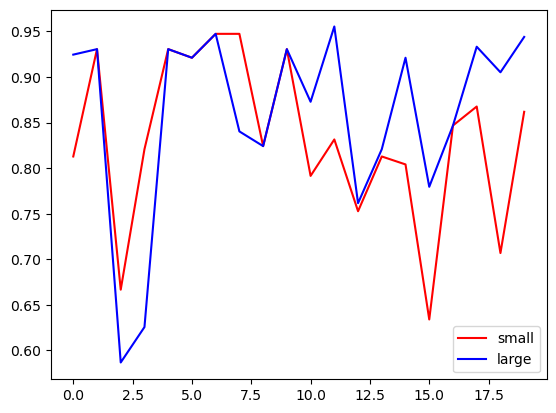

In [44]:
plt.plot(range(20) , sample['bleu'], color='red')
plt.plot(range(20) , large['bleu'], color='blue')
plt.legend(['small', 'large'])